# Loading Data

In [1]:
# %load_ext autoreload
# %autoreload 2
from data_utils import _read_data, _fill_missing_values, _feature_engineering, _one_hot_encoding

df = _read_data()

# Data Analysis

## Distributions

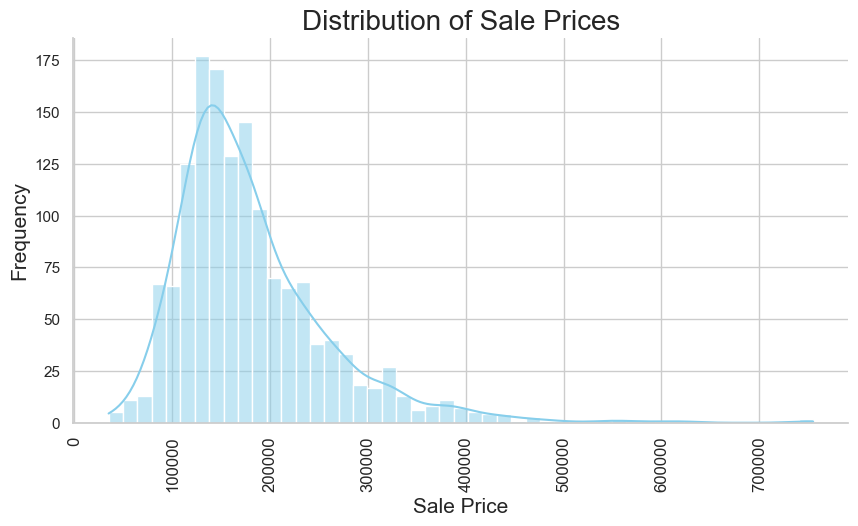

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of Sale Prices', fontsize=20)
plt.xlabel('Sale Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
sns.despine()

plt.show()

# Profiling

In [3]:
# from ydata_profiling import ProfileReport
# in case of error: pip install typing_extensions==4.7.1 --upgrade
# profile = ProfileReport(df, title="Profiling Report")

# profile.to_file("reports/data_report.html")

# Missing Values

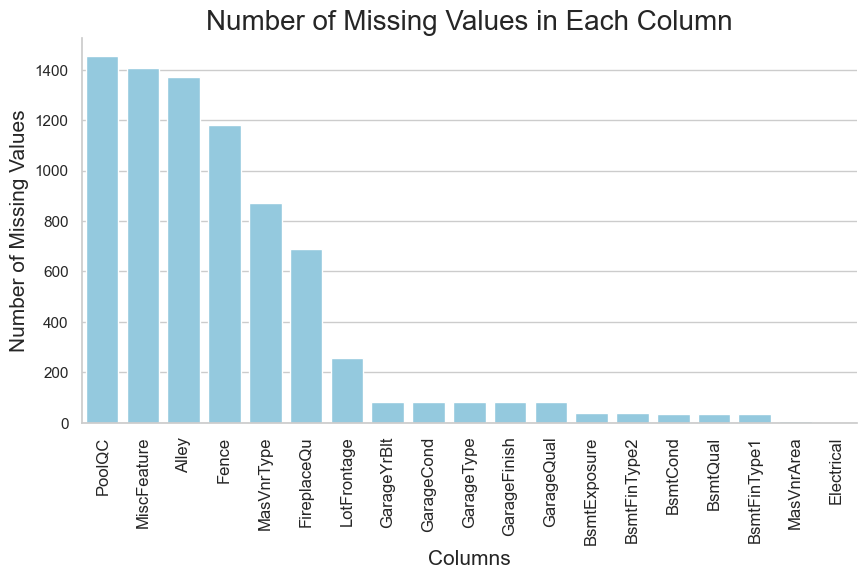

In [4]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]


sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, color='skyblue')

plt.title('Number of Missing Values in Each Column', fontsize=20)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Number of Missing Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
sns.despine()
plt.show()

In [5]:
# PoolQC            1453    – code as 'absence'
# MiscFeature       1406    – code as 'absence'
# Alley             1369    – code as 'absence'
# Fence             1179    – code as 'absence'
# MasVnrType        872     – code as 'absence'
# FireplaceQu       690     – code as 'absence'
# GarageType        81      – code as 'absence'
# GarageCond        81      – code as 'absence'
# GarageFinish      81      – code as 'absence'
# GarageQual        81      – code as 'absence'
# BsmtFinType2      38      – code as 'absence'
# BsmtExposure      38      – code as 'absence'
# BsmtQual          37      – code as 'absence'
# BsmtCond          37      – code as 'absence'
# BsmtFinType1      37      – code as 'absence'
# ----------------------------------------------
# GarageYrBlt       81      – code as '0'  ## MD: Fill with YearBuilt
# ----------------------------------------------
# Electrical        1       – fill in with the most frequently occurring value in the column
# MasVnrArea        8       – fill in with the most frequently occurring value in the column
# LotFrontage       259     – fill in with the most frequently occurring value in the column

In [6]:
df = _fill_missing_values(df=df)

# Numerical Features Histograms

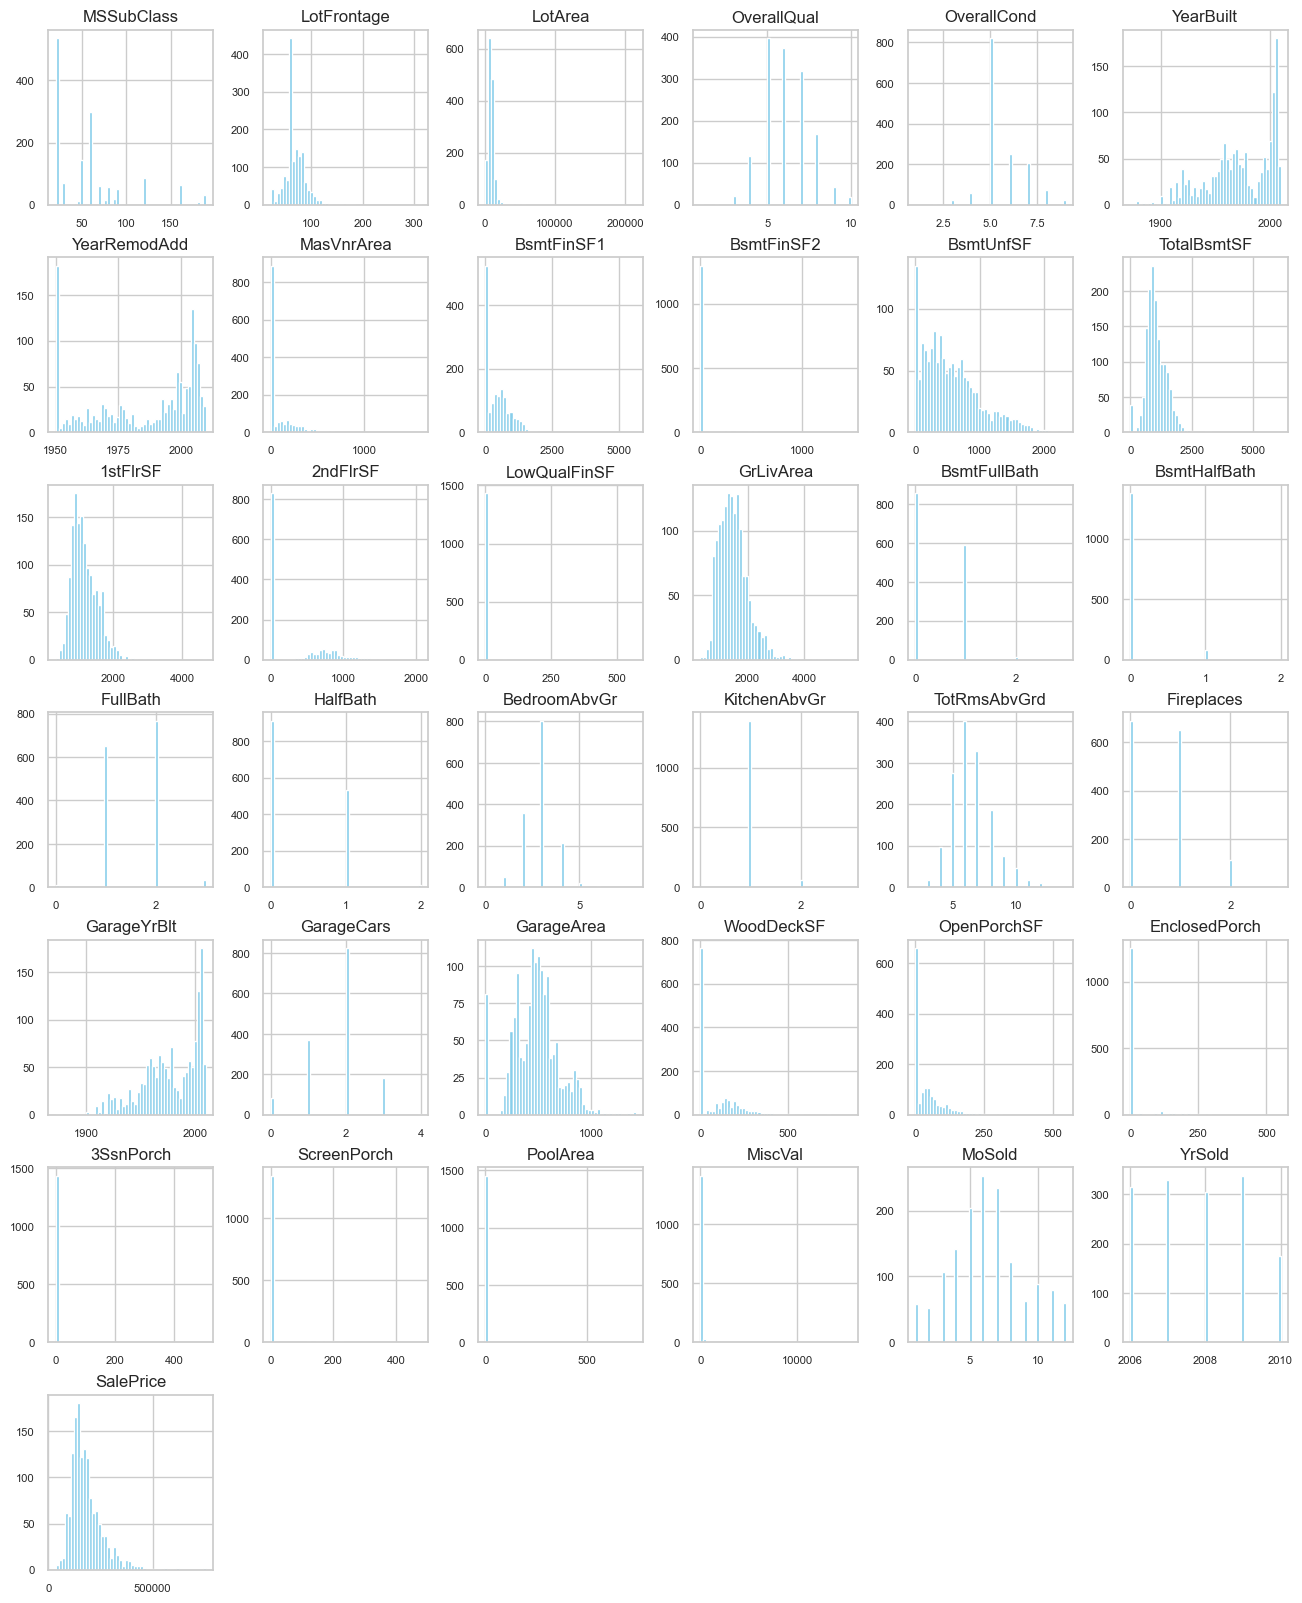

In [7]:
(df
    .select_dtypes(
        include=[np.number])
    .hist(
        figsize=(16, 20), 
        bins=50, 
        xlabelsize=8,
        ylabelsize=8,
        color='skyblue')
);

## Engineered Features 

In [8]:
df = _feature_engineering(df=df)

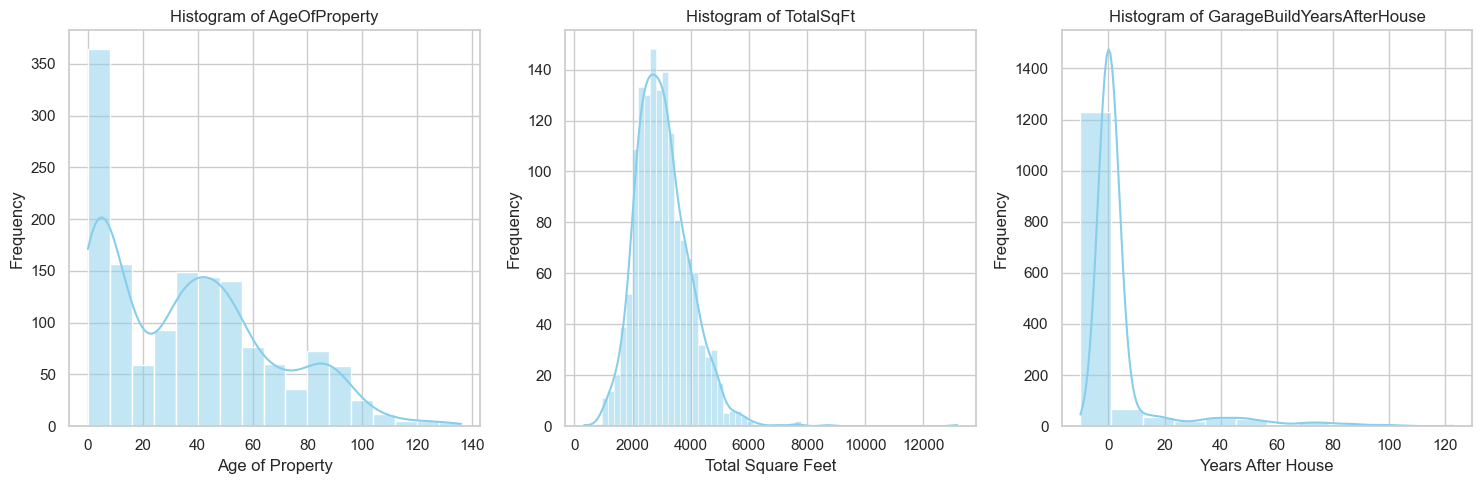

In [9]:
# Ustawienie stylu
sns.set(style="whitegrid")

# Tworzenie figury i osi
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram dla 'AgeOfProperty'
sns.histplot(df['AgeOfProperty'], ax=axs[0], color='skyblue', kde=True)
axs[0].set_title('Histogram of AgeOfProperty')
axs[0].set_xlabel('Age of Property')
axs[0].set_ylabel('Frequency')

# Histogram dla 'TotalSqFt'
sns.histplot(df['TotalSqFt'], ax=axs[1], color='skyblue', kde=True)
axs[1].set_title('Histogram of TotalSqFt')
axs[1].set_xlabel('Total Square Feet')
axs[1].set_ylabel('Frequency')

# Histogram dla 'GarageBuildYearsAfterHouse'
sns.histplot(df['GarageBuildYearsAfterHouse'], ax=axs[2], color='skyblue', kde=True)
axs[2].set_title('Histogram of GarageBuildYearsAfterHouse')
axs[2].set_xlabel('Years After House')
axs[2].set_ylabel('Frequency')

# Wyświetlenie wykresów
plt.tight_layout()
plt.show()

## OneHot Encoded Features

In [10]:
df = _one_hot_encoding(df=df)

In [11]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Regression Modeling

In [12]:
# Easy regression model
    # Linear Regression
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Plot predictions - Real values
# plt.scatter(y_train_rdg, y_train, c = "blue",  label = "Training data")
# plt.scatter(y_test_rdg, y_test, c = "black",  label = "Validation data")
# plt.title("Linear regression with Ridge regularization")
# plt.xlabel("Predicted values")
# plt.ylabel("Real values")
# plt.legend(loc = "upper left")
# plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
# plt.show()

In [ ]:
from sklearn.metrics import r2_score

lry_pred = linear_regressor.predict(X_test)
r2 = r2_score(y_test, lry_pred)

print(f'Linear Regressor - R²: {r2}')

In [ ]:
# Intermediate regression models
    # Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=0, 
                                     max_depth=10, 
                                     min_samples_leaf=100,
                                     )
dt_regressor.fit(X_train, y_train)

In [ ]:
dty_pred = dt_regressor.predict(X_test)

r2 = r2_score(y_test, dty_pred)

print(f'Decision Tree Regressor - R²: {r2}')

In [ ]:
    # Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, 
                                     random_state=0, 
                                     max_depth=10, 
                                     min_samples_split=10, 
                                     min_samples_leaf=100)
rf_regressor.fit(X_train, y_train)

In [ ]:
rfy_pred = rf_regressor.predict(X_test)
r2 = r2_score(y_test, rfy_pred)

print(f'Random Forest Regressor - R²: {r2}')

In [ ]:
    #Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=3000,
                                         learning_rate=0.05,
                                         max_depth=4,
                                         random_state=0)
gb_regressor.fit(X_train, y_train)

In [ ]:
gby_pred = gb_regressor.predict(X_test)

r2 = r2_score(y_test, gby_pred)

print(f'Gradient Boosting Regressor- R²: {r2}')

In [ ]:
    # SVR (Support Vector Regression)
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf',
                    C=1.0,
                    epsilon=0.1)
svr_regressor.fit(X_train, y_train)
svry_pred = svr_regressor.predict(X_test)

In [ ]:
r2 = r2_score(y_test, svry_pred)

print(f'Support Vector Regression - R²: {r2}')

In [ ]:
# Advanced Regression Model
    # XGBoost
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', # Funkcja celu regresji
                                 colsample_bytree = 0.3, # Udział kolumn przy budowie każdego drzewa
                                 learning_rate = 0.05,   # Współczynnik uczenia się
                                 max_depth = 3,         # Maksymalna głębokość drzewa
                                 alpha = 10,            # Parametr regularyzacji L1
                                 n_estimators = 2200)     # Liczba drzew w modelu

xgb_regressor.fit(X_train, y_train)

In [ ]:
xgby_pred = xgb_regressor.predict(X_test)
r2 = r2_score(y_test, xgby_pred)

print(f'R²: {r2}')